In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train1 = pd.read_csv("/content/drive/MyDrive/Deep Learning/XY_train_0.85.csv")

In [ ]:
test1 = pd.read_csv("/content/drive/MyDrive/Deep Learning/XY_test_0.85.csv")

In [ ]:
Y_train1 = train1.iloc[:, 5]
X_train1 = train1.iloc[:, 0:5]
Y_test1 = test1.iloc[:, 5]
X_test1 = test1.iloc[:, 0:5]

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_train1)
#X_train1 = scaler.transform(X_train1)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_test1)
#X_test1 = scaler.transform(X_test1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
! pip install catboost

     |████████████████████████████████| 67.3MB 44kB/s 


In [ ]:
from sklearn import ensemble
from catboost import CatBoostRegressor

In [ ]:
model_catBoost = CatBoostRegressor()

In [ ]:
depth = [3,1,2,6,4,5,7,8,9,10]
learning_rate = [0.03,0.001,0.01,0.1,0.2,0.3]
l2_leaf_reg= [3,1,5,10,100]       

In [ ]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {'depth': depth,
    "learning_rate":learning_rate,
    'l2_leaf_reg': l2_leaf_reg}

In [ ]:
# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=model_catBoost,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=100,
            scoring = 'r2',
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
#catBoost_best= random_cv.fit(X_train1,Y_train1)

In [ ]:
#catBoost_best.best_estimator_

In [ ]:
#catBoost_best.best_params_

In [ ]:
#catBoost_best.best_score_

In [ ]:
from sklearn import ensemble
model1 = CatBoostRegressor(logging_level='Silent', random_state=101,learning_rate=0.1,depth=4, 
                        l2_leaf_reg = 1, early_stopping_rounds=100)

In [ ]:
model1.fit(X_train1,Y_train1)

In [ ]:
model1.score(X_train1,Y_train1)

0.9997657315337216

In [ ]:
model1.score(X_test1,Y_test1)

0.9754989091637227

In [ ]:
y_pred = model1.predict(X_test1)

In [ ]:
count = 0
for i in range(len(Y_test1)):
  if abs(y_pred[i]-Y_test1.iloc[i]) <=0.5:
    count += 1

count

60

In [ ]:
import sklearn.metrics as sm
y_test = Y_test1
y_test_pred = y_pred
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Regressor model performance:
Mean absolute error(MAE) = 0.29
Mean squared error(MSE) = 0.16
Median absolute error = 0.17
Explain variance score = 0.98
R2 score = 0.98


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model1, X = X_train1, y = Y_train1, cv = 5)
print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))

Accuracy:94.38 %
Standard Deviation:1.60 %


In [ ]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# create model
model = model1
# evaluate model
scores = cross_val_score(model, X= X_train1, y= Y_train1, scoring = "r2", cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores),std(scores)))

Accuracy: 0.943 (0.013)


In [ ]:
scores

array([0.96708722, 0.94167972, 0.92968953, 0.95599295, 0.93644635,
       0.94273021, 0.94425503, 0.95403082, 0.93036704, 0.95232195,
       0.92049907, 0.92377314, 0.95771688, 0.95025642, 0.94404752])

In [ ]:
print(min(scores))

0.9204990742585408


In [ ]:
print(mean(scores))

0.9433929228605359


In [ ]:
print(max(scores))

0.9670872167141278


In [ ]:
#data2 = pd.read_csv("/content/drive/MyDrive/Deep Learning/Results.csv", index_col= "ID")
#data2.head()

In [ ]:
#data2 = pd.DataFrame(y_test_pred, y_test)

In [ ]:
#data2.to_csv('/content/drive/MyDrive/Deep Learning/Results1.csv')

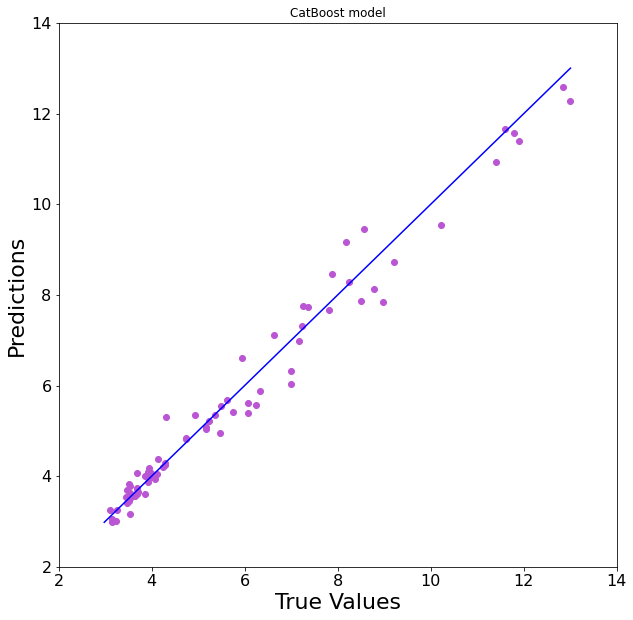

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='mediumorchid')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=22)
plt.ylabel('Predictions', fontsize=22)
# plt.axis('equal')
plt.title("CatBoost model")
plt.xlim(2, 14)
plt.ylim(2, 14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
plt.savefig("CatBoost_model.png")

In [1]:
data.head()

NameError: ignored